In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("Solarize_Light2")

In [ ]:
def timber(in_arr, head, tail):
    if head == tail:
        return in_arr[head]
    return sum(in_arr[head:tail+1]) - min(timber(in_arr, head+1, tail), timber(in_arr, head, tail-1))

In [2]:
# under cooked
# def timber(in_arr, head, tail):
#     if head == tail:
#         return in_arr[head]
#     return max(in_arr[head] + min(timber(in_arr, head+2, tail), timber(in_arr, head+1, tail-1)), in_arr[tail] + min(timber(in_arr, head+1, tail-1), timber(in_arr, head, tail-2)))

In [1]:
# calculate the segment sum to reduce sum calculation
def segment_sum(in_arr, length):
    # empty table
    sum_arr = [[0 for _ in range(length+1)] for _ in range(length+1)]
    for i in range(length):
        sum_arr[i][i] = in_arr[i]
        for j in range(i+1, length):
            sum_arr[i][j] = sum_arr[i][j - 1] + in_arr[j]

    return sum_arr

In [4]:
def timber_BU(in_arr, sum_arr, length):
    # init memory
    mem = [[(in_arr[row], 'S') if row == col else (0, ' ') for row in range(length)] for col in range(length)]
    # starting j
    start_j = 1
    while start_j < length:
        # this work that i reset to 0 every time, go back to the top row
        # while j only restart where j where originally with one step a head
        j = start_j
        i = 0
        while i < length and j < length:
            # relation
            if i != j and i < j:
                if mem[i+1][j][0] <= mem[i][j-1][0]:
                    mem[i][j] = (sum_arr[i][j] - mem[i+1][j][0], 'L')
                elif mem[i][j-1][0] < mem[i+1][j][0]:
                    mem[i][j] = (sum_arr[i][j] - mem[i][j-1][0], 'R')
            # move both j and i
            j += 1
            i += 1
        # move the next diagonal rows on the next columns
        start_j += 1
        # return result from desired input
    return mem

In [5]:
sum_table = segment_sum([9, 6 , 5 ,7], 4)
timber_BU([9, 6, 5, 7], sum_table, 4)

[[(9, 'S'), (9, 'L'), (14, 'L'), (15, 'L')],
 [(0, ' '), (6, 'S'), (6, 'L'), (12, 'R')],
 [(0, ' '), (0, ' '), (5, 'S'), (7, 'R')],
 [(0, ' '), (0, ' '), (0, ' '), (7, 'S')]]

In [ ]:
def perform_test(n_max, n_step):
    iter_arr = []
    time_arr = []
    for i in range(n_step, n_max+1, n_step):
        # random timber generators
        curr_arr = np.random.randint(1, 1001, size=i)
        # timer
        start_time = time.time()
        timber(curr_arr, 0, i-1)
        end_time = time.time()
        time_diff = end_time - start_time
        # record
        time_arr.append(time_diff)
        iter_arr.append(i)

        # print(f"done iter: {i}")

    return time_arr, iter_arr

In [ ]:
# Generate x values
x_values = range(0, 21, 1)  # Adjust the range as needed

# Calculate y values
y_values = [2**x for x in x_values]

# Plot the function
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = 2^x$')

# Show the plot
plt.show()

In [ ]:
time_arr, iter_arr = perform_test(21, 1)

In [ ]:
# plot
plt.plot(iter_arr, time_arr)
plt.plot(iter_arr[18:], time_arr[18:], 'ro')
plt.xticks(iter_arr)
plt.xlabel("timber length")
plt.ylabel("time (seconds)")
plt.title("Timber() performance based on timber length")

# Annotate the point of interest
plt.text(iter_arr[20], time_arr[20], f'({iter_arr[20]}, {time_arr[20]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[19], time_arr[19], f'({iter_arr[19]}, {time_arr[19]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[18], time_arr[18], f'({iter_arr[18]}, {time_arr[18]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.show()

In [6]:
def perform_test_BU(n_max, n_step):
    iter_arr = []
    time_arr = []
    for i in range(n_step, n_max+1, n_step):
        # random timber generators
        curr_arr = np.random.randint(1, 1001, size=i)
        # seg sum
        sum_mat = segment_sum(curr_arr, i)
        # timer
        start_time = time.time()
        timber_BU(curr_arr, sum_mat,i)
        end_time = time.time()
        time_diff = end_time - start_time
        # record
        time_arr.append(time_diff)
        iter_arr.append(i)

        print(f"done iter: {i}")

    return time_arr, iter_arr

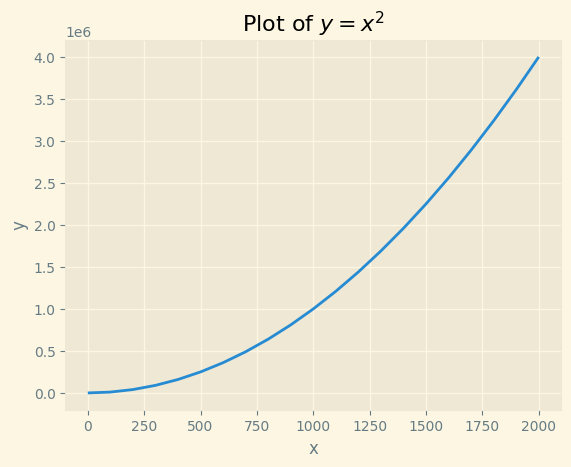

In [4]:
# Generate x values
x_values = range(0, 2001, 100)  # Adjust the range as needed

# Calculate y values
y_values = [x**2 for x in x_values]

# Plot the function
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Plot of $y = x^2$')

# Show the plot
plt.show()

In [7]:
time_arr, iter_arr = perform_test_BU(2000, 100)

done iter: 100
done iter: 200
done iter: 300
done iter: 400
done iter: 500
done iter: 600
done iter: 700
done iter: 800
done iter: 900
done iter: 1000
done iter: 1100
done iter: 1200
done iter: 1300
done iter: 1400
done iter: 1500
done iter: 1600
done iter: 1700
done iter: 1800
done iter: 1900
done iter: 2000


In [8]:
curr_arr = np.random.randint(1, 1001, size=2000)
# timer
start_time = time.time()
timber_BU(curr_arr, 0, 2000-1)
end_time = time.time()
time_diff = end_time - start_time
print(time_diff)

57.87606239318848


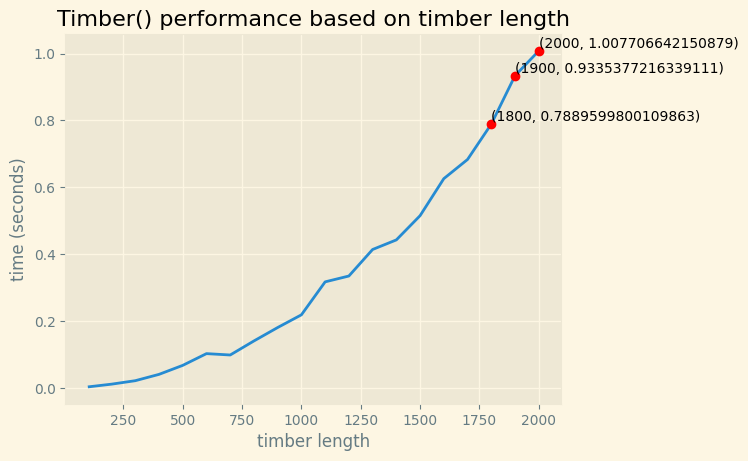

In [8]:
# plot
plt.plot(iter_arr, time_arr)
plt.plot(iter_arr[17:], time_arr[17:], 'ro')
# plt.xticks(iter_arr)
plt.xlabel("timber length")
plt.ylabel("time (seconds)")
plt.title("Timber() performance based on timber length")

# Annotate the point of interest
plt.text(iter_arr[19], time_arr[19], f'({iter_arr[19]}, {time_arr[19]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[18], time_arr[18], f'({iter_arr[18]}, {time_arr[18]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.text(iter_arr[17], time_arr[17], f'({iter_arr[17]}, {time_arr[17]})', 
         horizontalalignment='left', verticalalignment='bottom')
plt.show()

In [10]:
time_arr[18]

65.45961380004883

In [12]:
time_arr[17]

53.21198797225952